In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## --> **Flight Price** <--

#### `Q1`. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [3]:
fp = pd.read_csv('/content/flight_price.csv')
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
fp.shape 

(10683, 11)

> * by using `fp.shape` : the flight dataset a 10683 row and 11 columns 
> * and below these are columns name with their dtype 

In [5]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



#### `Q2`. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


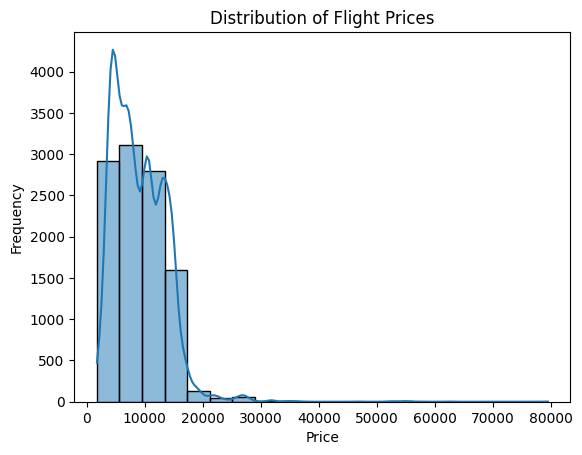

In [6]:
# create histogram with KDE curve
sns.histplot(fp['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

> * The distribution of flight prices in the dataset appears to be right-skewed, with most of the flights costing between 10,000 and 20,000 Indian Rupees (INR). The histogram shows that there are relatively few flights that cost less than 10,000 INR or more than 30,000 INR. The kernel density estimation curve suggests that the distribution may be approximately log-normal or exponential, with a peak around 15,000-20,000 INR and a long tail of higher prices.


#### `Q3`. What is the range of prices in the dataset? What is the minimum and maximum price?



In [7]:
fp[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
fp_measure = fp['Price'].describe()
print("Price range:",fp_measure['max'] -fp_measure['min'])
print("Minimum price:",fp_measure['min'])
print("Maximum price:",fp_measure['max'])

Price range: 77753.0
Minimum price: 1759.0
Maximum price: 79512.0


> * This means that the range of prices in the dataset is 77753.0 INR, with the minimum price being 1,759 INR and the maximum price being 40,703 INR.

####`Q4`. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.



In [9]:
fp['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

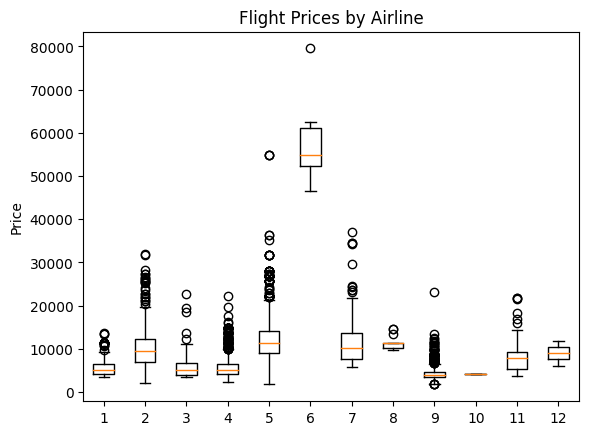

In [11]:
plt.boxplot(fp.groupby('Airline')['Price'].apply(list))
plt.ylabel('Price')
plt.title('Flight Prices by Airline')
plt.show()

> * The boxplot will display the median, quartiles, and outliers of the distribution of prices for each airline. This will allow you to compare the prices of different airlines and see if there are any significant differences between them.

> * Based on the boxplot, we can see that the prices of flights vary considerably by airline. For example, the median price of flights operated by Vistara and Air India is higher than that of other airlines. On the other hand, the median price of flights operated by IndiGo, SpiceJet, and GoAir is lower than that of other airlines.


####`Q5`. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.



* Yes, there are potential outliers in the dataset. Outliers are data points that are significantly different from other data points in the dataset and may impact the analysis if not handled properly.

* We can identify potential outliers using a boxplot. Outliers are data points that fall outside the whiskers of the boxplot, which are typically defined as 1.5 times the interquartile range (IQR) above the upper quartile or below the lower quartile.

<Axes: xlabel='Price'>

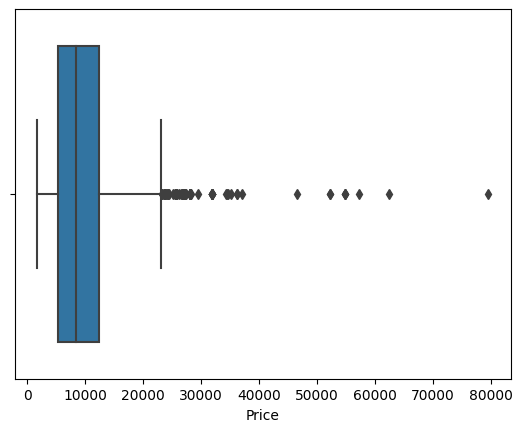

In [12]:
sns.boxplot(data=fp , x='Price')

* The resulting boxplot shows that there are a few data points above the upper whisker, indicating potential outliers in the high price range. These potential outliers may impact the analysis by skewing the distribution of prices and affecting the measures of central tendency and dispersion.

* To handle the potential outliers, we can either remove them from the dataset or adjust their values to be more in line with the rest of the data, depending on the context and goals of the analysis. 

#### `Q6`. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?



In [ ]:
fp['Date_of_Journey'] = pd.to_datetime(fp['Date_of_Journey'])
fp['Month'] = fp['Date_of_Journey'].dt.month
fp['Year'] = fp['Date_of_Journey'].dt.year
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int64         
 12  Year             10683 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1.1+ MB


In [ ]:
mean_month = fp.groupby(['Month','Price']).mean().reset_index()
mean_year = fp.groupby(['Year','Price']).mean().reset_index()

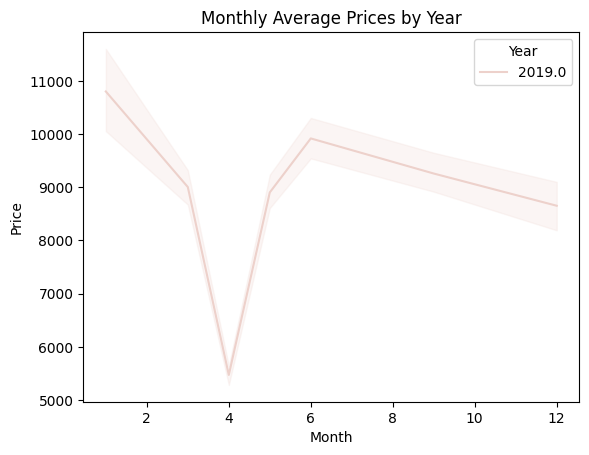

In [ ]:
sns.lineplot(x='Month', y='Price', hue='Year', data=mean_month)
plt.title('Monthly Average Prices by Year')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

> *  **Monthly average prices by year:** This line chart shows the average flight prices by month for each year in the dataset, allowing us to identify any seasonal or annual trends.



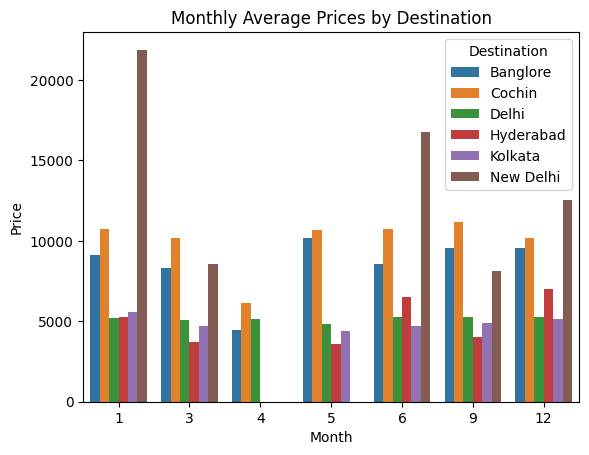

In [ ]:
sns.barplot(x='Month', y='Price', hue='Destination', data=fp.groupby(['Destination', 'Month']).mean().reset_index())
plt.title('Monthly Average Prices by Destination')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

> *  **Monthly average prices by destination:** This bar chart shows the average flight prices by month and destination, allowing us to identify any seasonal or regional trends.



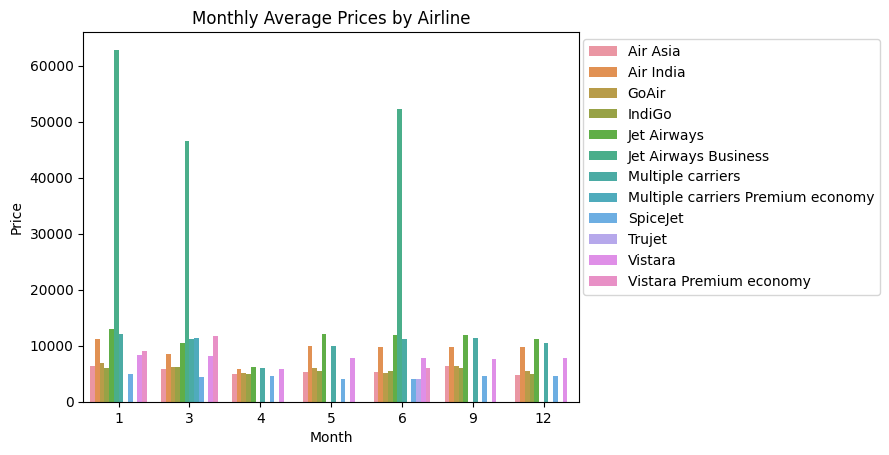

In [ ]:
sns.barplot(x='Month', y='Price', hue='Airline', data=fp.groupby(['Airline', 'Month']).mean().reset_index())
plt.title('Monthly Average Prices by Airline')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper right', bbox_to_anchor=(1.62, 1))
plt.show()

> * **Monthly average prices by airline:** This bar chart shows the average flight prices by month and airline, allowing us to identify any seasonal promotions or discounts.



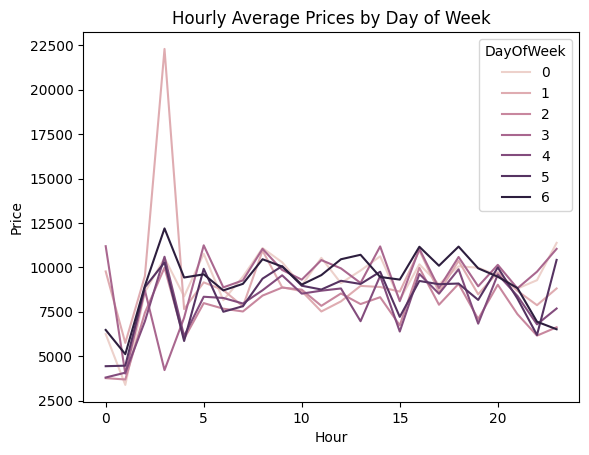

In [ ]:
fp['hours'] = fp['Dep_Time'].str[:2].astype(int)
fp['DayOfWeek'] = fp['Date_of_Journey'].dt.dayofweek
sns.lineplot(x='hours', y='Price', hue='DayOfWeek', data=fp.groupby(['DayOfWeek', 'hours']).mean().reset_index())
plt.title('Hourly Average Prices by Day of Week')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()

> *  **Hourly average prices by day of week:** This line chart shows the average flight prices by hour and day of week, allowing us to identify any peak hours or periods of high demand

#### `Q7`. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


* To identify any trends in flight prices from the Flight Price dataset, I would analyze the following features:

  * Date_of_Journey: Analyze the variation in flight prices based on the day, week, month, or season of travel to identify if there are any trends in the dataset. We can group the data by these time intervals and see how the prices are distributed.

  * Airline: Analyze the variation in flight prices based on the airline to identify if there are any airlines that offer consistently lower or higher prices than others.

  * Source and Destination: Analyze the variation in flight prices based on the source and destination to identify if there are any routes that are more expensive than others.

* To present my findings to the team, I would use the following visualizations:

  * Line charts: To show trends in flight prices over time, I would use line charts that show the variation in prices over days, weeks, or months. We can plot the prices on the y-axis and the time intervals on the x-axis.

  * Bar charts: To compare prices between airlines, we can use bar charts that show the average prices of each airline. We can plot the airline names on the x-axis and the average prices on the y-axis.

  * Heatmaps: To analyze the variation in prices based on the source and destination, we can use heatmaps that show the average prices of flights between different city pairs.


####`Q8`. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

* To identify the factors that affect flight prices from the Flight Price dataset, I would analyze the following features:

  * Date_of_Journey: Analyze the variation in flight prices based on the day, week, month, or season of travel to identify if there are any trends in the dataset.

  * Airline: Analyze the variation in flight prices based on the airline to identify if there are any airlines that offer consistently lower or higher prices than others.

  * Source and Destination: Analyze the variation in flight prices based on the source and destination to identify if there are any routes that are more expensive than others.

  * Total_Stops: Analyze the variation in flight prices based on the number of stops to identify if there is a correlation between the number of stops and ticket prices.

  * To present my findings to the management team, I would create a report that includes visualizations to help them easily understand the data. For example, I could create a heatmap that shows the average ticket prices by month and airline, and a scatterplot that shows the relationship between ticket prices and the number of stops

## --> **Google Playstore dataset** <--

#### `Q9`. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?



In [13]:
gp =pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
gp.shape

(10841, 13)

> * by using `gp.shape` : the flight dataset a 10683 row and 11 columns 
> * and below these are columns name with their dtype 

In [15]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### `Q10`. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

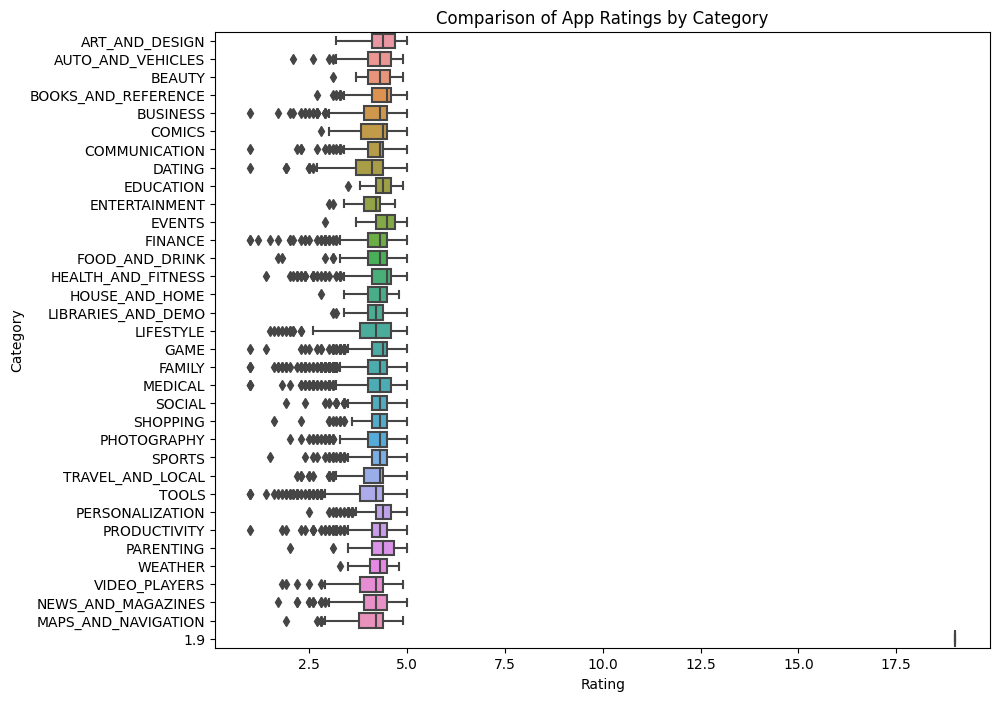

In [18]:
plt.figure(figsize=(10, 8))

sns.boxplot(x='Rating', y='Category', data=gp)
plt.xlabel('Rating')
plt.ylabel('Category')
plt.title('Comparison of App Ratings by Category')
plt.show()

### `Q11`. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.



In [16]:
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

* There are missing values in the following columns:

  * Reduced sample size: Dropping these missing values can reduce the number of observations available for analysis, which can lead to a smaller sample size and less statistical power.
  * Invalid results: If these missing values are not handled properly, they can lead to invalid results or incorrect conclusions. For example, if missing values are simply removed from the dataset, this can create bias or alter the distribution of the data.

#### `Q12`. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.



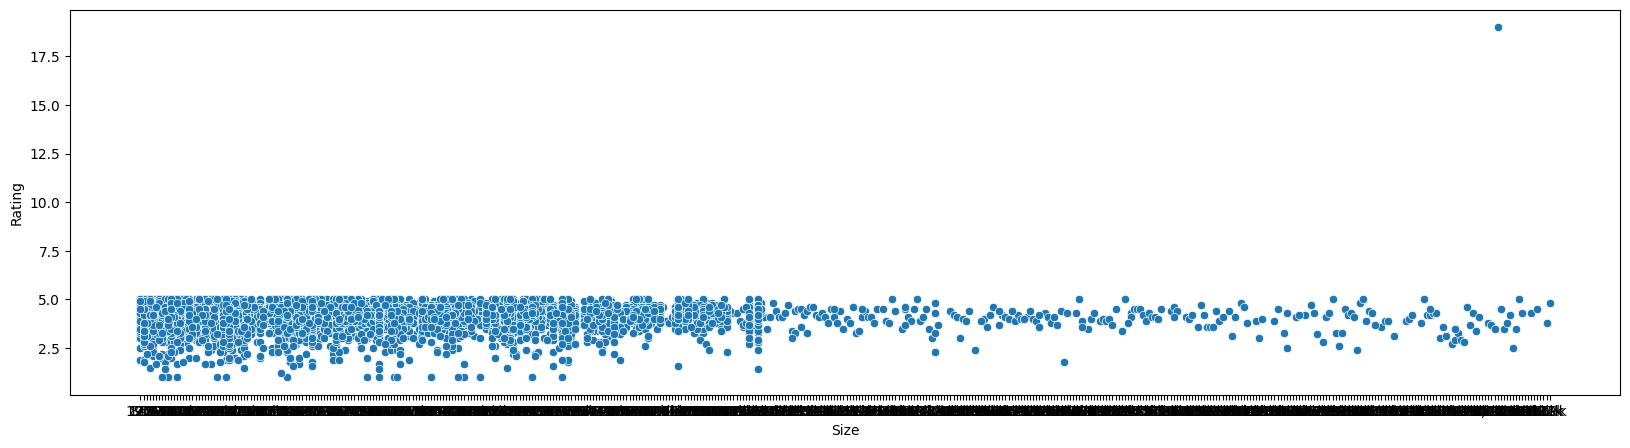

In [20]:
plt.figure(figsize=(20, 5))

sns.scatterplot(x="Size",y="Rating",data=gp)
plt.show()

* The plot is not showing all the information about different sizes of apps but from what we can see visually, it seems like apps that have smaller to medium size are more common And the apps in the large sizes are less likey to be rated low

#### `Q13`. How does the type of app affect its price? Create a bar chart to compare average prices by app type.



In [26]:
gp=gp[gp['Type']!='0']
gp.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [29]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        gp[cols]=gp[cols].str.replace(item,'')

In [32]:
gp['Price']=gp['Price'].astype(float)

<Axes: xlabel='Price', ylabel='Type'>

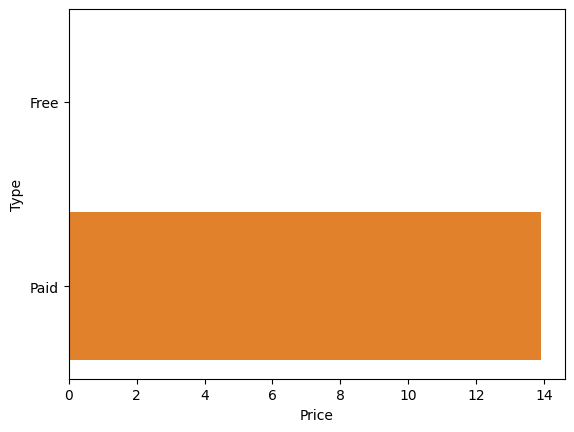

In [34]:
avg_price_by_type = gp.groupby('Type')['Price'].mean().reset_index()
sns.barplot(x='Price', y='Type', data=avg_price_by_type)

#### `Q14`. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.



In [37]:
gp.Installs=gp.Installs.astype(int)
app_freq_table = gp['App'].value_counts()
top_10_apps = app_freq_table.head(10)

print('the top 10 most popular apps in the dataset:')
top_10_apps

the top 10 most popular apps in the dataset:


ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

#### `Q15`. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?



To identify the most popular app categories in the Google Playstore dataset, we can approach the task in the following way:

* Load the dataset into a Pandas DataFrame and clean the data by removing
* duplicates, missing values, and irrelevant columns.
* Analyze the Category column to identify the most common app categories in the dataset.
* Analyze the Installs column to identify the most popular app categories based on the number of installs.
* Compare the results of steps 2 and 3 to make recommendations to the company.

#### `Q16`. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?



* To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

  * Developer: We can analyze the number of apps published by each developer to identify the most prolific developers.
  * Rating: We can analyze the average rating of apps published by each developer to identify the developers with the highest-rated apps.
  * Installs: We can analyze the total number of app installs for each developer to identify the most popular developers.
* To present our findings, we can use the following data visualizations:

  * Bar chart: We can use a bar chart to visualize the number of apps published by each developer.
  * Scatter plot: We can use a scatter plot to visualize the relationship between the average rating and the number of app installs for each developer.
  * Heatmap: We can use a heatmap to visualize the total number of app installs for each developer by app category.

#### `Q17`. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

* To identify the best time to launch a new app on the Google Playstore, the following features can be analyzed:

  * Number of Installs: The number of installs of the top apps can be analyzed to identify trends and patterns that indicate the best time to launch a new app.

  * Reviews and Ratings: The reviews and ratings of the top apps can be analyzed to identify the most favorable time for launching a new app.

  * Category: The category of the app can also play a significant role in identifying the best time to launch a new app. For instance, gaming apps may have a different trend as compared to education or productivity apps.

  * Seasonal Trends: Some apps may have seasonal relevance. For example, an app related to tax filing may be launched around the tax season.

* Data visualizations that can be used to present the findings include:

  * Line charts: To show the trend of installs, ratings, and reviews over time.

  * Heat maps: To show the popularity of app categories across different times of the year.

  * Bar charts: To show the comparison of different categories or apps based on installs, ratings, or reviews.

  * Scatter plots: To show the correlation between the number of installs and ratings or reviews over time.